In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(df['Age'].isnull().sum())

177


In [11]:
#xu ly dac trung gioi tinh (Sex)
df_processed = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df_processed.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [12]:
features = ['Pclass', 'SibSp', 'Parch', 'Sex_male']
target = 'Age'

In [13]:
data_with_age = df_processed.dropna(subset=['Age'])
data_without_age = df_processed[df_processed['Age'].isnull()]

x_train = data_with_age[features]
y_train = data_with_age[target]

In [ ]:
X_pridict = data_without_age[features]

if X_pridict.empty:
    print("No data to predict")
else:
    model = LinearRegression()
    model.fit(x_train, y_train)
    predicted_ages = model.predict(X_pridict[features])
    indices_to_fill = df[df['Age'].isnull()].index
    df.loc[indices_to_fill, 'Age'] = predicted_ages



In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 

In [25]:
# Doi voi cot Embarked
print(df['Embarked'].isnull().sum())

2


In [27]:
df['Fare'].dtype

dtype('float64')

In [31]:
imputer_fare = SimpleImputer(strategy='median')
df['Fare'] = imputer_fare.fit_transform(df[['Fare']])[:,0]
print(df['Fare'].isnull().sum())

0


In [34]:
features_for_embarked = ['Pclass', 'Age', 'Fare']
target_embarked = 'Embarked'

df_embarked_known = df.dropna(subset=[target_embarked]).copy()
df_embarked_unknown = df[df[target_embarked].isnull()].copy()

In [35]:
if df_embarked_unknown.empty:
    print("No data to predict")
else:
    label_encoder_embarked = LabelEncoder()
    df_embarked_known[target_embarked + '_encoded'] = label_encoder_embarked.fit_transform(df_embarked_known[target_embarked])
    
    scale_embarked = StandardScaler()
    X_train_embarked_scaled = scale_embarked.fit_transform(df_embarked_known[features_for_embarked])
    X_pridict_embarked_scaled = scale_embarked.transform(df_embarked_unknown[features_for_embarked])
    y_train_embarked = df_embarked_known[target_embarked + '_encoded']
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_embarked_scaled, y_train_embarked)
    predicted_embarked_encoded = knn_model.predict(X_pridict_embarked_scaled)
    predicted_embarked_original = label_encoder_embarked.inverse_transform(predicted_embarked_encoded)
    indices_to_fill_embarked = df[df[target_embarked].isnull()].index
    df.loc[indices_to_fill_embarked, target_embarked] = predicted_embarked_original

    

In [36]:
print(df['Embarked'].isnull().sum())

0


In [37]:
# Xu ly cot Cabin
print(df['Cabin'].isnull().sum())
df['Cabin'].dtype

687


dtype('O')

In [38]:
df['Deck'] = df['Cabin'].str[0]
print(df['Deck'].isnull().sum())

687


In [39]:
df['Deck'] = df['Deck'].fillna('U')

In [40]:
print(df['Deck'].value_counts())

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [41]:
deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck', drop_first=False)
df = pd.concat([df, deck_dummies], axis=1)


In [42]:
#Tạo cột family_size như bài gốc (tổng sibsp + parch + 1).
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Tạo cột Is_Alone (1 nếu Family_Size == 1, 0 nếu không)
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)



In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,False,False,False,False,False,False,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,False,False,True,False,False,False,False,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,False,False,False,False,False,False,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,False,False,True,False,False,False,False,False,False,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,False,False,False,False,False,False,False,False,True,1,1


In [ ]:
#Trích xuất danh xưng (title) từ cột name (ví dụ: Mr., Mrs., Miss) và tạo cột title. Gộp các danh xưng hiếm (như Dr, Rev) thành nhóm "Rare".
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)')[0]
print(df['Title'].value_counts())


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [47]:
#Tạo cột fare_per_person bằng cách chia fare cho family_size để thể hiện giá vé trung bình mỗi người.
df['Fare_Per_Person'] = df['Fare'] / df['Family_Size']
print(df['Fare_Per_Person'].isnull().sum())
df.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Family_Size,Is_Alone,Title,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,False,False,False,False,False,False,False,False,True,2,0,Mr,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,False,False,True,False,False,False,False,False,False,2,0,Mrs,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,False,False,False,False,False,False,False,False,True,1,1,Miss,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,False,False,True,False,False,False,False,False,False,2,0,Mrs,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,False,False,False,False,False,False,False,False,True,1,1,Mr,8.05000


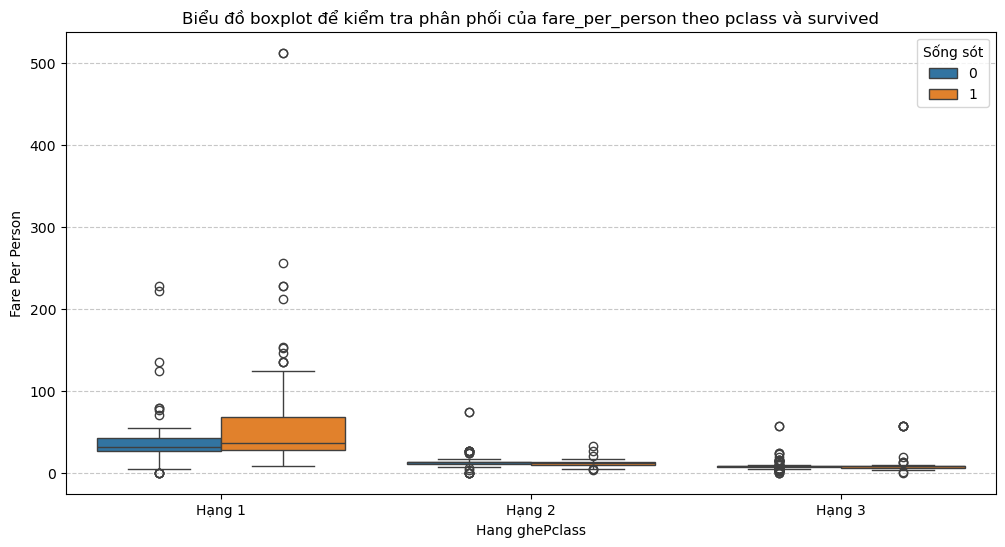

In [55]:
#Vẽ biểu đồ boxplot để kiểm tra phân phối của fare_per_person theo pclass và survived
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare_Per_Person', hue='Survived', data=df)
plt.title('Biểu đồ boxplot để kiểm tra phân phối của fare_per_person theo pclass và survived')
plt.xlabel('Hang ghePclass')
plt.ylabel('Fare Per Person')
plt.xticks(ticks=[0, 1, 2], labels=['Hạng 1', 'Hạng 2', 'Hạng 3'])
plt.legend(title='Sống sót', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
from scipy.stats import ttest_ind

# Tách dữ liệu fare_per_person theo nhóm survived
fare_survived = df[df['Survived'] == 1]['Fare_Per_Person']
fare_not_survived = df[df['Survived'] == 0]['Fare_Per_Person']

# Thực hiện kiểm định t-test
t_test_result = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# In kết quả
print("T-test statistic:", t_test_result.statistic)
print("P-value:", t_test_result.pvalue)

T-test statistic: 5.66834233260942
P-value: 2.7645717530749568e-08


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Các cột cần xử lý
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Deck', 'Title']

# Pipeline cho dữ liệu số
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline cho dữ liệu phân loại
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Tạo pipeline hoàn chỉnh
data_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Áp dụng pipeline lên dữ liệu
processed_data = data_pipeline.fit_transform(df)
print(processed_data)

  (np.int32(0), np.int32(0))	-0.5343825061599078
  (np.int32(0), np.int32(1))	-0.5024451714361923
  (np.int32(0), np.int32(2))	0.4327933656785018
  (np.int32(0), np.int32(3))	-0.4736736092984604
  (np.int32(0), np.int32(6))	1.0
  (np.int32(0), np.int32(8))	1.0
  (np.int32(0), np.int32(11))	1.0
  (np.int32(0), np.int32(20))	1.0
  (np.int32(0), np.int32(32))	1.0
  (np.int32(1), np.int32(0))	0.6383346083855744
  (np.int32(1), np.int32(1))	0.7868452935884461
  (np.int32(1), np.int32(2))	0.4327933656785018
  (np.int32(1), np.int32(3))	-0.4736736092984604
  (np.int32(1), np.int32(4))	1.0
  (np.int32(1), np.int32(7))	1.0
  (np.int32(1), np.int32(9))	1.0
  (np.int32(1), np.int32(14))	1.0
  (np.int32(1), np.int32(33))	1.0
  (np.int32(2), np.int32(0))	-0.2412032275235372
  (np.int32(2), np.int32(1))	-0.4888542575852486
  (np.int32(2), np.int32(2))	-0.47454519624983954
  (np.int32(2), np.int32(3))	-0.4736736092984604
  (np.int32(2), np.int32(6))	1.0
  (np.int32(2), np.int32(7))	1.0
  (np.int32(2)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Các đặc trưng sử dụng để dự đoán
features_for_survived = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Family_Size', 'Is_Alone', 'Fare_Per_Person'] + list(deck_dummies.columns)

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X = df[features_for_survived]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7430167597765364
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       105
           1       0.70      0.66      0.68        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [63]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier # Import the model type
import numpy as np

# Giả sử df, X, y đã được chuẩn bị và grid_search đã chạy xong từ bước trước
# Lấy mô hình tốt nhất từ Grid Search
# Nếu bạn chưa chạy Grid Search, bạn có thể khởi tạo một mô hình mới ở đây
# Ví dụ: model_to_evaluate = RandomForestClassifier(n_estimators=100, random_state=42)
if 'grid_search' in locals() and hasattr(grid_search, 'best_estimator_'):
    model_to_evaluate = grid_search.best_estimator_
    print("\nSử dụng mô hình tốt nhất từ Grid Search để đánh giá bằng cross-validation.")
else:
    # Fallback: Sử dụng một mô hình RandomForestClassifier mặc định nếu Grid Search chưa chạy
    model_to_evaluate = RandomForestClassifier(n_estimators=100, random_state=42)
    print("\nSử dụng mô hình RandomForestClassifier mặc định để đánh giá bằng cross-validation (vì Grid Search chưa chạy hoặc không tìm thấy).")
    # Lưu ý: Để có kết quả tốt nhất, nên chạy Grid Search trước

print("\nĐang thực hiện đánh giá mô hình bằng 5-fold cross-validation...")

# Định nghĩa các chỉ số đánh giá
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Thực hiện cross-validation
# cv=5: Sử dụng 5 fold
# scoring=scoring_metrics: Đánh giá bằng tất cả các chỉ số đã định nghĩa
cv_results = cross_validate(estimator=model_to_evaluate,
                            X=X,
                            y=y,
                            cv=5,
                            scoring=scoring_metrics,
                            return_train_score=False) # Không cần điểm trên tập train trong trường hợp này

print("Đánh giá bằng cross-validation đã hoàn thành.")

# Báo cáo các chỉ số
print("\nKết quả đánh giá bằng Cross-Validation (5-fold):")

for metric in scoring_metrics:
    # Tên key trong cv_results là 'test_' + tên chỉ số
    scores = cv_results[f'test_{metric}']
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{metric.capitalize()}: {mean_score:.4f} (± {std_score:.4f})")

print("\nCác chỉ số đánh giá đã được báo cáo.")


Sử dụng mô hình RandomForestClassifier mặc định để đánh giá bằng cross-validation (vì Grid Search chưa chạy hoặc không tìm thấy).

Đang thực hiện đánh giá mô hình bằng 5-fold cross-validation...
Đánh giá bằng cross-validation đã hoàn thành.

Kết quả đánh giá bằng Cross-Validation (5-fold):
Accuracy: 0.7228 (± 0.0211)
Precision: 0.6430 (± 0.0343)
Recall: 0.6285 (± 0.0240)
F1: 0.6353 (± 0.0243)
Roc_auc: 0.7822 (± 0.0275)

Các chỉ số đánh giá đã được báo cáo.


In [ ]:
#Tạo biểu đồ feature importance để xác định các đặc trưng quan trọng nhất ảnh hưởng đến khả năng sống sót.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Thường dùng kết hợp với matplotlib để tạo biểu đồ đẹp hơn
from sklearn.ensemble import RandomForestClassifier # Import model type if not using best_estimator_

# Giả sử df, X, y đã được chuẩn bị
# Lấy mô hình đã huấn luyện (ví dụ: mô hình tốt nhất từ Grid Search hoặc mô hình dùng cho CV)

model_for_importance = None
if 'grid_search' in locals() and hasattr(grid_search, 'best_estimator_'):
    model_for_importance = grid_search.best_estimator_
    print("\nSử dụng mô hình tốt nhất từ Grid Search để hiển thị Feature Importance.")
elif 'model_to_evaluate' in locals():
     model_for_importance = model_to_evaluate
     print("\nSử dụng mô hình đã dùng cho Cross-Validation để hiển thị Feature Importance.")
else:
    # Fallback: Huấn luyện một mô hình mới nếu không tìm thấy mô hình nào
    print("\nKhông tìm thấy mô hình đã huấn luyện. Huấn luyện một RandomForestClassifier mới để hiển thị Feature Importance.")
    model_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
    model_for_importance.fit(X, y) # Cần huấn luyện mô hình trước khi xem importance


# Kiểm tra xem mô hình có thuộc tính feature_importances_ không
if hasattr(model_for_importance, 'feature_importances_'):
    print("\nĐang tạo biểu đồ Feature Importance...")

    # Bước 1 & 2: Lấy feature importances từ mô hình
    importances = model_for_importance.feature_importances_

    # Bước 3: Lấy tên các đặc trưng
    feature_names = X.columns

    # Bước 4 & 5: Tạo Series/DataFrame và sắp xếp
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    # Bước 6, 7 & 8: Tạo và hiển thị biểu đồ
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)

    plt.title('Tầm quan trọng của các đặc trưng trong Mô hình Random Forest')
    plt.xlabel('Mức độ quan trọng')
    plt.ylabel('Đặc trưng')
    plt.tight_layout()
    plt.show()

    print("Đã tạo biểu đồ Feature Importance.")

else:
    print("\nMô hình được sử dụng không có thuộc tính 'feature_importances_'.")
    print("Feature Importance chỉ có sẵn cho các mô hình dựa trên cây như Random Forest, Gradient Boosting, Decision Tree.")